**IMPORTS**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

**Data Preprocessing**

In [8]:
data = pd.read_csv("covid_19.csv")

In [9]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [16]:
data = data.dropna().reset_index().drop("index", axis=1)
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
1,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
2,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
3,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0,0,Western Pacific
4,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific


In [17]:
# rows and columns in dataset before cleaning
data.shape

(11622, 10)

**DATA CLEANING**

**Missing values**

In [18]:
# before cleaning
data.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [19]:
#check the duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Confirmed, Deaths, Recovered, Active, WHO Region]
Index: []


In [20]:
# drop null values
data = data.dropna(subset=['Province/State'])

In [21]:
#after droping null values
# rows and columns in dataset after cleaning
data.shape

(11622, 10)


**Identify which variables are categorical, discrete and continuous**

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


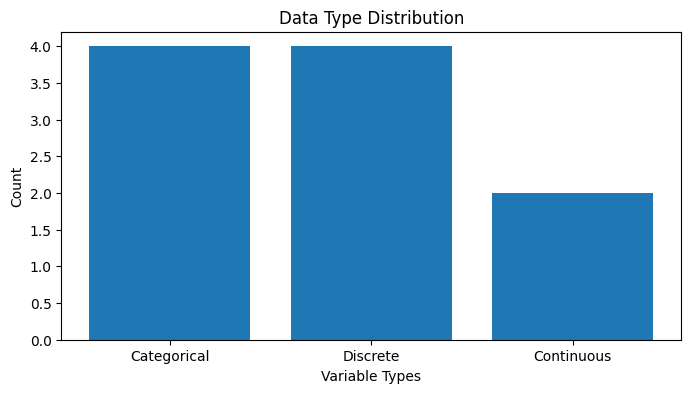

Missing Values:
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [22]:
# Get data types for each column
data_types = data.dtypes
print(data_types)

# Separate data types into categories
categorical_vars = data_types[data_types == 'object']
discrete_vars = data_types[data_types == 'int64']
continuous_vars = data_types[data_types == 'float64']

# Plot the data types
plt.figure(figsize=(8,4))
plt.bar(['Categorical', 'Discrete', 'Continuous'], [len(categorical_vars), len(discrete_vars), len(continuous_vars)])
plt.title("Data Type Distribution")
plt.xlabel("Variable Types")
plt.ylabel("Count")
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


**Statistical parameters**

In [23]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,11622.000000,11622.000000,11622.000000,11622.000000,11622.000000,11622.000000
mean,24.328151,38.791522,1446.910601,74.536138,793.503184,578.871279
std,27.793961,94.270297,7851.450453,496.209267,5918.435420,3915.830553
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,-14.000000
25%,17.900000,-63.050100,5.000000,0.000000,0.000000,0.000000
50%,30.796350,101.272650,107.000000,1.000000,18.000000,4.000000
75%,43.666100,116.414200,438.000000,4.000000,207.000000,50.000000
max,71.706900,165.618000,68135.000000,5340.000000,64435.000000,50633.000000


**Apply Min-Max Normalization, Z-score Standardization and Robust scalar on the numerical data variables**.

In [24]:
numerical_columns = ["Confirmed", "Deaths", "Recovered", "Active"]

In [25]:
min_max_scaler = MinMaxScaler()
data[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

In [26]:
z_score_scaler = StandardScaler()
data[numerical_columns] = z_score_scaler.fit_transform(data[numerical_columns])

In [27]:
robust_scaler = RobustScaler()
data[numerical_columns] = robust_scaler.fit_transform(data[numerical_columns])

In [30]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,-0.247113,-0.25,-0.086957,-0.08,Western Pacific
1,New South Wales,Australia,-33.8688,151.2093,2020-01-22,-0.247113,-0.25,-0.086957,-0.08,Western Pacific
2,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,-0.247113,-0.25,-0.086957,-0.08,Western Pacific
3,Queensland,Australia,-28.0167,153.4000,2020-01-22,-0.247113,-0.25,-0.086957,-0.08,Western Pacific
4,South Australia,Australia,-34.9285,138.6007,2020-01-22,-0.247113,-0.25,-0.086957,-0.08,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
11617,Anguilla,United Kingdom,18.2206,-63.0686,2020-06-18,-0.240185,-0.25,-0.072464,-0.08,Europe
11618,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-06-18,-0.228637,0.00,-0.053140,-0.08,Europe
11619,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-06-18,-0.219400,0.00,-0.033816,-0.08,Europe
11620,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-06-18,-0.217090,-0.25,-0.024155,-0.08,Europe


**Correlation between the features of the dataset**



**grouping of data by months**

In [31]:
# Parse the date column (assuming the date column is named 'date')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

#Extract the month from the date
data['month'] = data['Date'].dt.strftime('%m')

#Group the data by month
grouped = data.groupby('month')

#Count or display the unique months
unique_months = grouped['month'].unique()
print(unique_months)

month
01    [01]
02    [02]
03    [03]
04    [04]
05    [05]
06    [06]
Name: month, dtype: object


**Deaths over months**

Text(0, 0.5, 'Sum of Deaths')

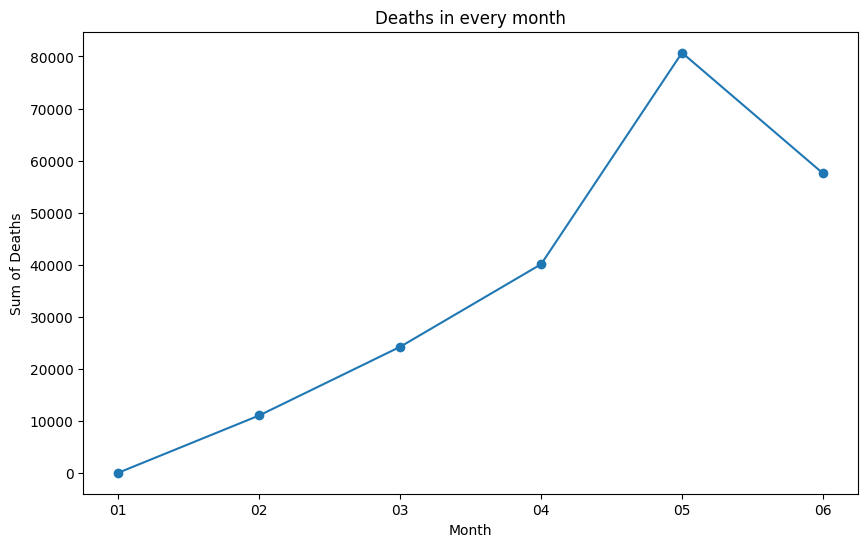

In [32]:
grouped = data.groupby('month')['Deaths'].sum().reset_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['month'], grouped['Deaths'], marker='o')
plt.title('Deaths in every month')
plt.xlabel('Month')
plt.ylabel('Sum of Deaths')



**Confirmed Cases over months**



Text(0, 0.5, 'Confirmed cases')

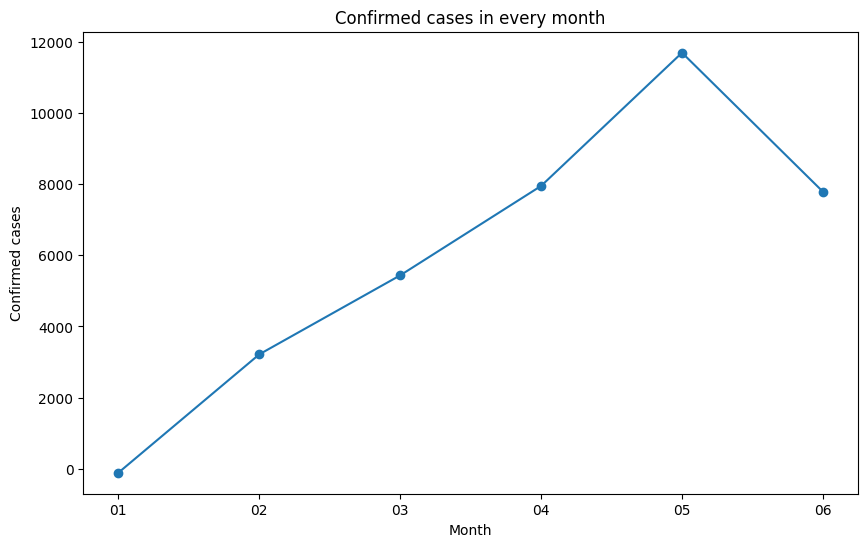

In [33]:
grouped = data.groupby('month')['Confirmed'].sum().reset_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['month'], grouped['Confirmed'], marker='o')
plt.title('Confirmed cases in every month')
plt.xlabel('Month')
plt.ylabel('Confirmed cases')



 **Recovered cases over months**



Text(0, 0.5, 'Recovered cases')

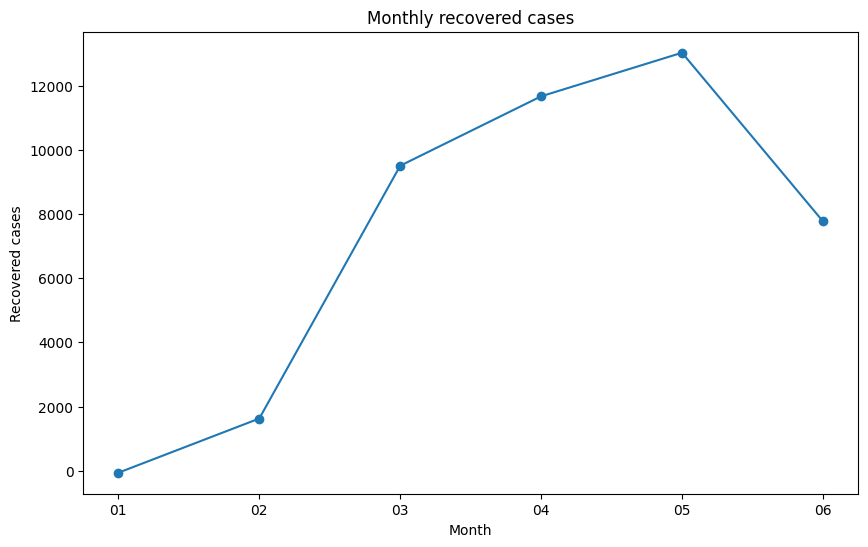

In [34]:
grouped = data.groupby('month')['Recovered'].sum().reset_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['month'], grouped['Recovered'], marker='o')
plt.title('Monthly recovered cases')
plt.xlabel('Month')
plt.ylabel('Recovered cases')

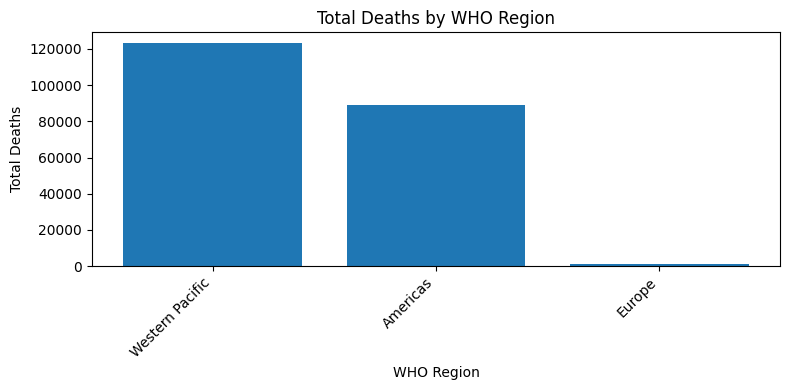

In [35]:
# Group the data by WHO Region and calculate the sum of deaths in each region
deaths_by_region = data.groupby('WHO Region')['Deaths'].sum().reset_index()

# Sort the data by the number of deaths (optional)
deaths_by_region = deaths_by_region.sort_values('Deaths', ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 4))
plt.bar(deaths_by_region['WHO Region'], deaths_by_region['Deaths'])
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by WHO Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

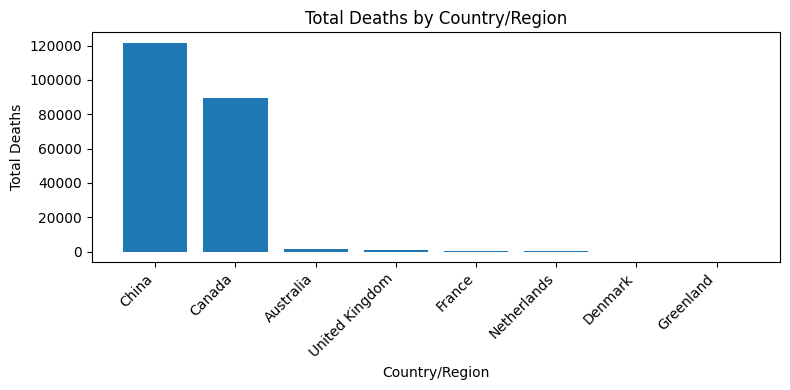

In [36]:
# Group the data by WHO Region and calculate the sum of deaths in each region
deaths_by_region = data.groupby('Country/Region')['Deaths'].sum().reset_index()

# Sort the data by the number of deaths (optional)
deaths_by_region = deaths_by_region.sort_values('Deaths', ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 4))
plt.bar(deaths_by_region['Country/Region'], deaths_by_region['Deaths'])
plt.xlabel('Country/Region')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Country/Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# **Exploratory Data Analysis**

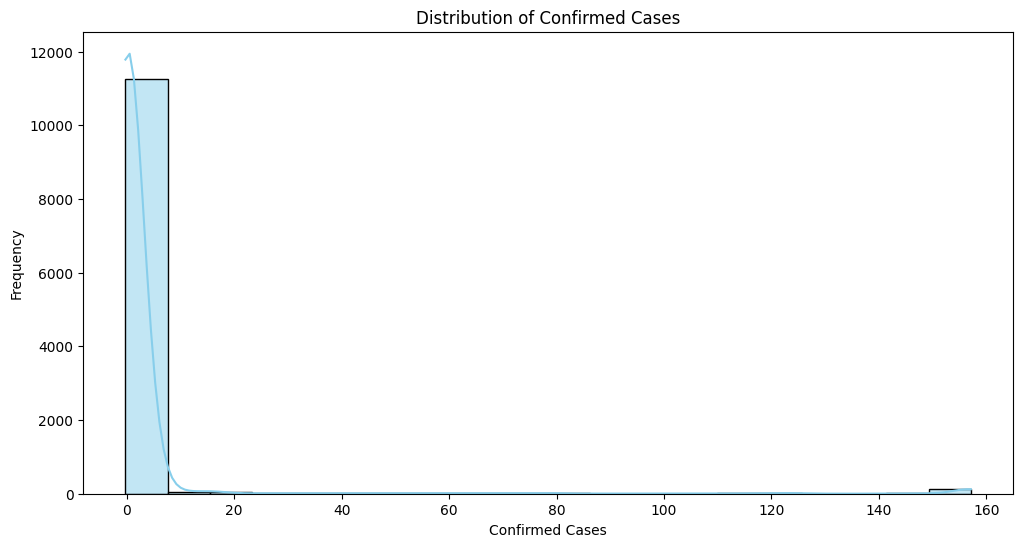

In [37]:
# Visualize the distribution of Confirmed, Deaths, and Recovered cases
plt.figure(figsize=(12, 6))
sns.histplot(data['Confirmed'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()

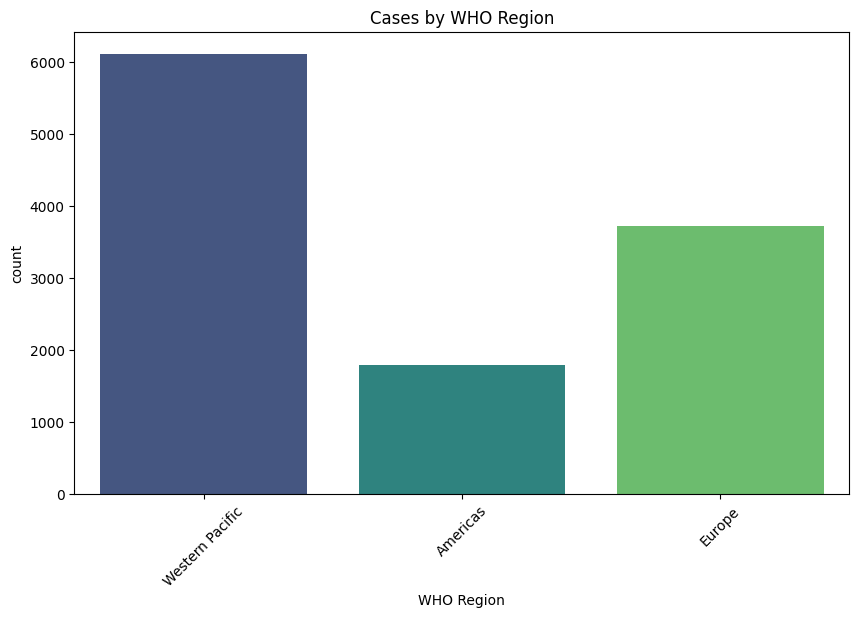

In [38]:
# Visualize the number of cases by WHO Region
plt.figure(figsize=(10, 6))
sns.countplot(x='WHO Region', data=data, palette='viridis')
plt.title("Cases by WHO Region")
plt.xticks(rotation=45)
plt.show()

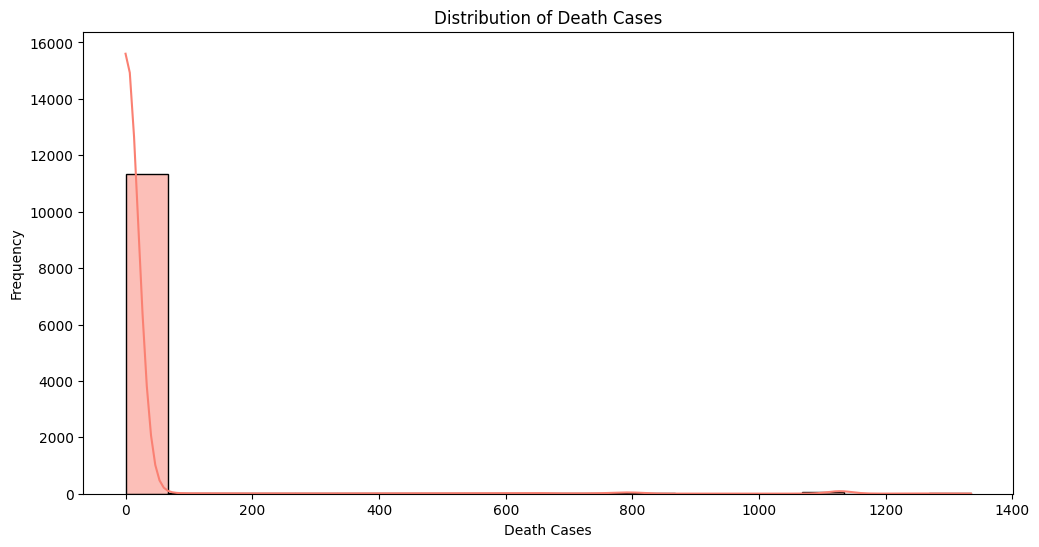

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Deaths'], kde=True, color='salmon', bins=20)
plt.title("Distribution of Death Cases")
plt.xlabel("Death Cases")
plt.ylabel("Frequency")
plt.show()

**Time Series Analysis**

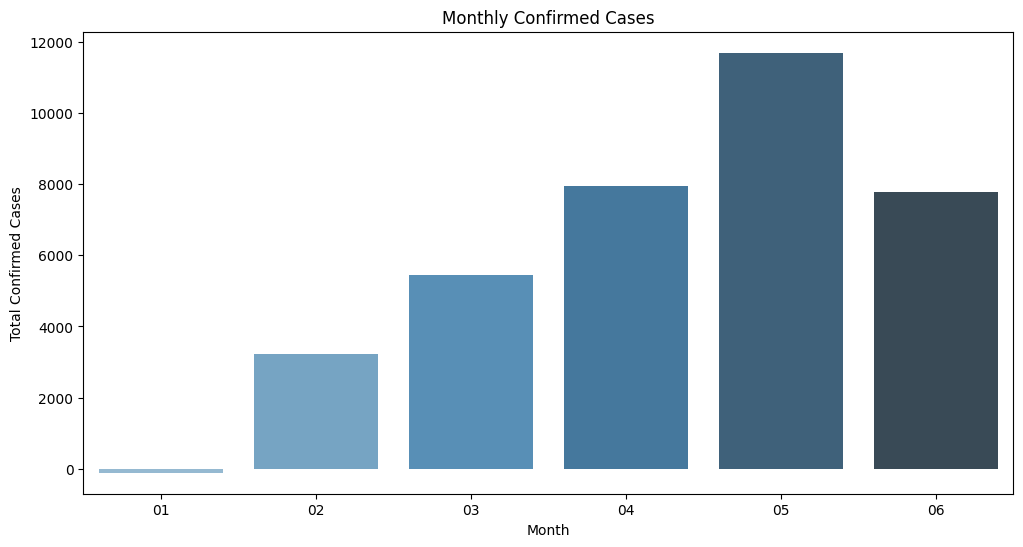

In [40]:
# Extract and analyze time trends
monthly_cases = data.groupby('month')['Confirmed'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_cases.index, y=monthly_cases.values, palette='Blues_d')
plt.title("Monthly Confirmed Cases")
plt.xlabel("Month")
plt.ylabel("Total Confirmed Cases")
plt.show()

Text(0, 0.5, 'Confirmed Cases')

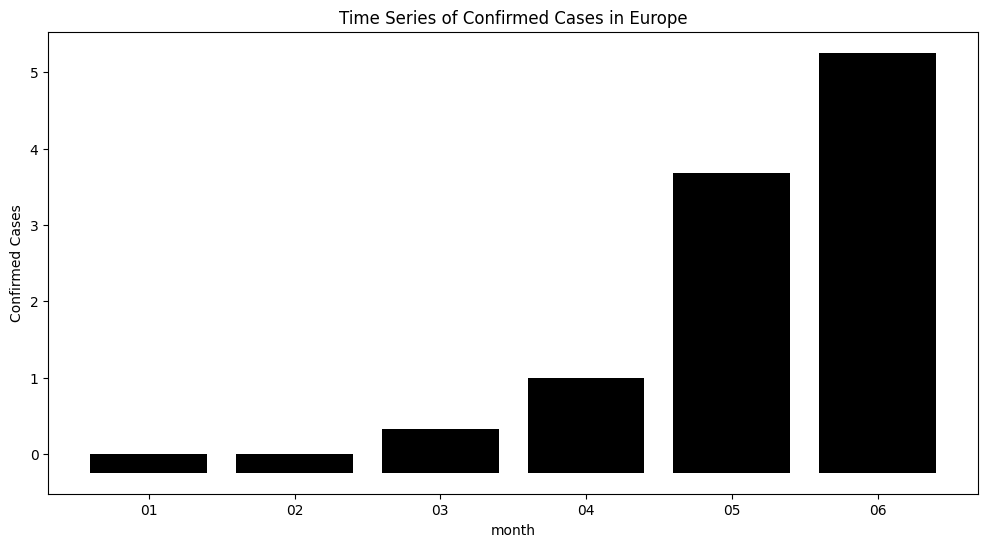

In [41]:
# Filter data for the 'Europe' region
europe_cases = data[data['WHO Region'] == 'Europe']

# Create a bar plot of Confirmed cases over time
plt.figure(figsize=(12, 6))
plt.bar(europe_cases['month'], europe_cases['Confirmed'], color='black')
plt.title("Time Series of Confirmed Cases in Europe")
plt.xlabel("month")
plt.ylabel("Confirmed Cases")

**Correlation**

Text(0.5, 1.0, 'Correlation Matrix')

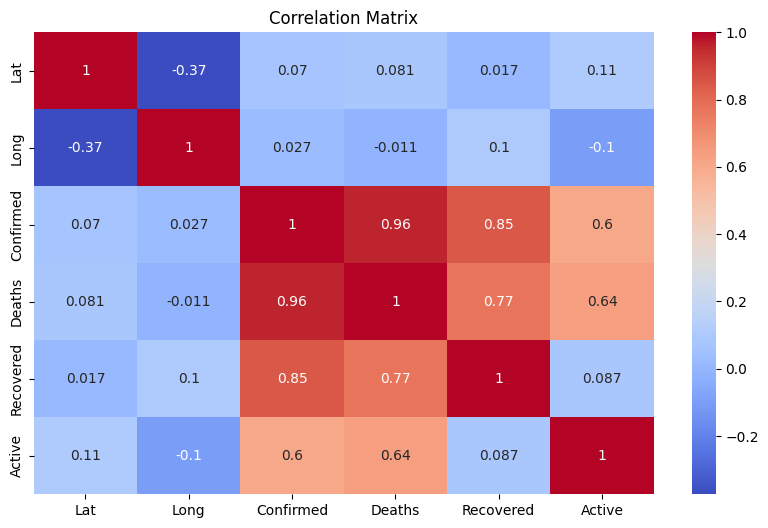

In [42]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

**Identify subgroups of features that can explore some interesting facts**

**COVID-19 Trends by Location (Province/State):**

---


here it can explore how COVID-19 trends vary by location (Province/State). This subgroup helps to identify regions with significant
variations in cases.

Text(0, 0.5, 'Confirmed Cases')

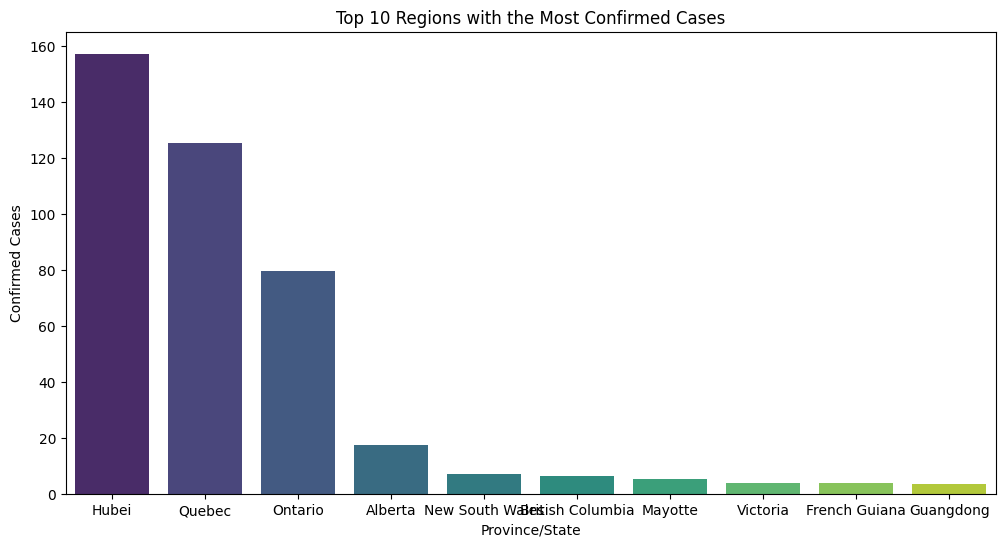

In [43]:
# Group data by Province/State and calculate the total confirmed cases for each location
province_cases = data.groupby('Province/State')['Confirmed'].max().reset_index()

# Sort the data to identify regions with the highest confirmed cases
province_cases = province_cases.sort_values('Confirmed', ascending=False)

# Create a bar plot to visualize the top regions with the most confirmed cases
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/State', y='Confirmed', data=province_cases.head(10), palette='viridis')
plt.title("Top 10 Regions with the Most Confirmed Cases")
plt.xlabel("Province/State")
plt.ylabel("Confirmed Cases")

**dummy encoding to categorical variables**

In [44]:
#encoding of the categorical variable

data_encoded = pd.get_dummies(data, columns=['Province/State', 'Country/Region', 'Date', 'WHO Region'])

In [45]:
data_encoded

,Lat,Long,Confirmed,Deaths,Recovered,Active,month,Province/State_Alberta,Province/State_Anguilla,Province/State_Anhui,...,Date_2020-06-12 00:00:00,Date_2020-06-13 00:00:00,Date_2020-06-14 00:00:00,Date_2020-06-15 00:00:00,Date_2020-06-16 00:00:00,Date_2020-06-17 00:00:00,Date_2020-06-18 00:00:00,WHO Region_Americas,WHO Region_Europe,WHO Region_Western Pacific
0,-35.4735,149.0124,-0.247113,-0.25,-0.086957,-0.08,01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-33.8688,151.2093,-0.247113,-0.25,-0.086957,-0.08,01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-12.4634,130.8456,-0.247113,-0.25,-0.086957,-0.08,01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-28.0167,153.4000,-0.247113,-0.25,-0.086957,-0.08,01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-34.9285,138.6007,-0.247113,-0.25,-0.086957,-0.08,01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,18.2206,-63.0686,-0.240185,-0.25,-0.072464,-0.08,06,0,1,0,...,0,0,0,0,0,0,1,0,1,0
11618,18.4207,-64.6400,-0.228637,0.00,-0.053140,-0.08,06,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11619,21.6940,-71.7979,-0.219400,0.00,-0.033816,-0.08,06,0,0,0,...,0,0,0,0,0,0,1,0,1,0
11620,-51.7963,-59.5236,-0.217090,-0.25,-0.024155,-0.08,06,0,0,0,...,0,0,0,0,0,0,1,0,1,0


.**Applying PCA**

In [46]:
# Select the columns you want to apply PCA to from your DataFrame
columns_to_pca = ["Confirmed", "Deaths", "Recovered", "Active"]

# Create a sub-DataFrame with only the selected columns
X = data[columns_to_pca]

# Initialize and fit the PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [47]:
# Initialize the PCA model
pca = PCA(n_components=2)

# Fit the PCA model to your preprocessed data
pca.fit(data_encoded)  # 'df' should contain your preprocessed data

# Transform the data to the first 'n_components' principal components
principal_components = pca.transform(data_encoded)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i + 1}' for i in range(2)])

In [48]:
print(principal_df.head())

         PC1         PC2
0 -28.157297  114.661505
1 -28.213133  116.638765
2 -26.923574   94.118356
3 -28.178355  118.119080
4 -27.719227  104.348883
